In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Projects/Machine Failure prediction/ai4i2020.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.shape

(10000, 14)

In [5]:
len(df['Product ID'].unique())


10000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


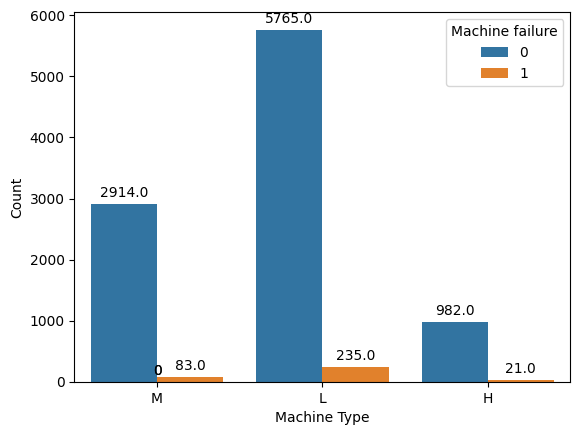

In [8]:
ax = sns.countplot(x='Type', data=df, hue='Machine failure')
plt.xlabel("Machine Type")
plt.ylabel("Count")

# Annotate counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

In [9]:
filtered_df=df[df['Machine failure']==1]

In [10]:
filtered_df.shape

(339, 14)

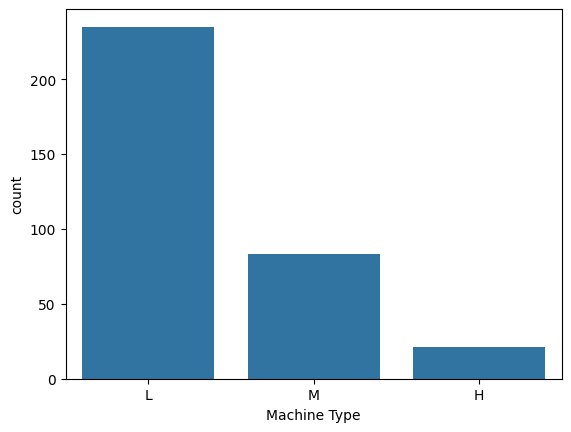

In [11]:
sns.countplot(x='Type', data=filtered_df)
plt.xlabel("Machine Type")
plt.ylabel("count")
plt.show()

In [12]:
df=df.drop(['UDI',"Product ID"], axis=1)

In [13]:
df_m=df[df['Type']=='M']
df_l=df[df['Type']=='L']
df_h=df[df['Type']=='H']

Type-L

Air temperature [K]


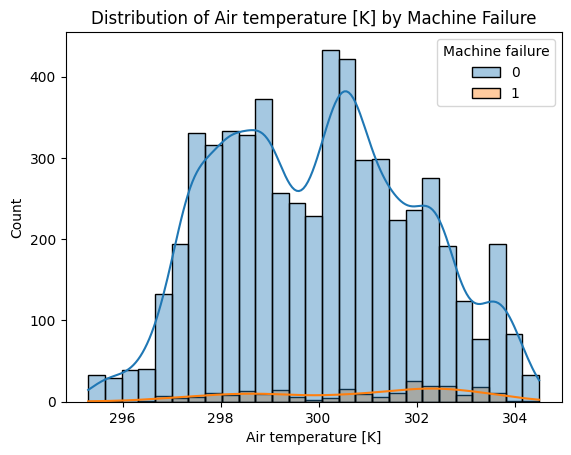

Process temperature [K]


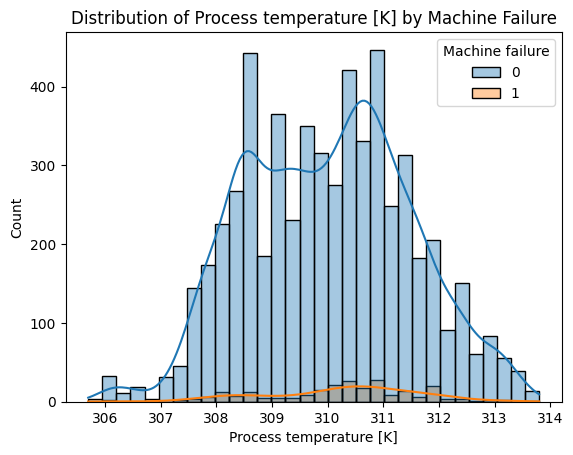

Rotational speed [rpm]


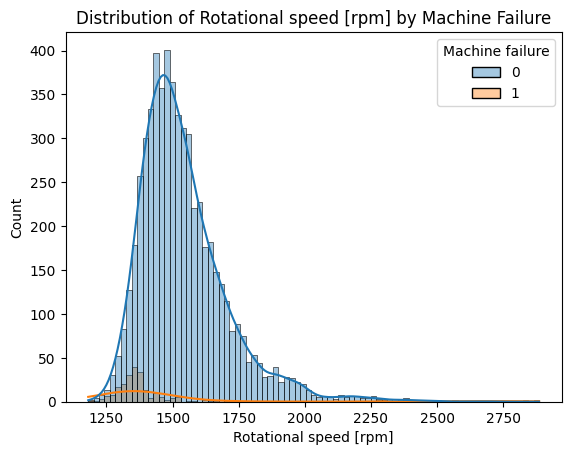

Torque [Nm]


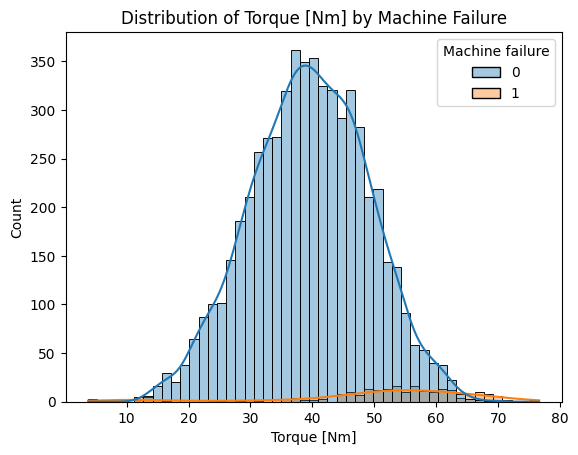

Tool wear [min]


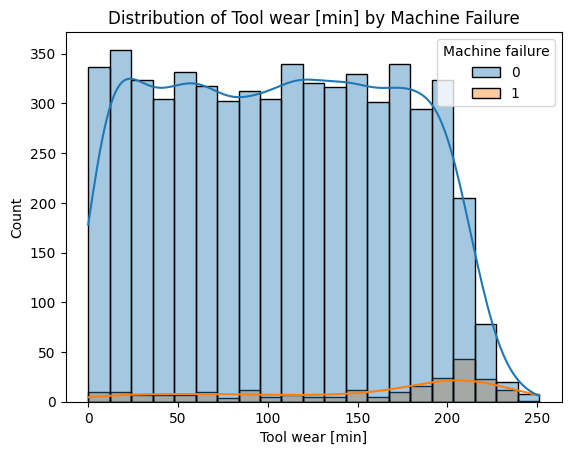

TWF


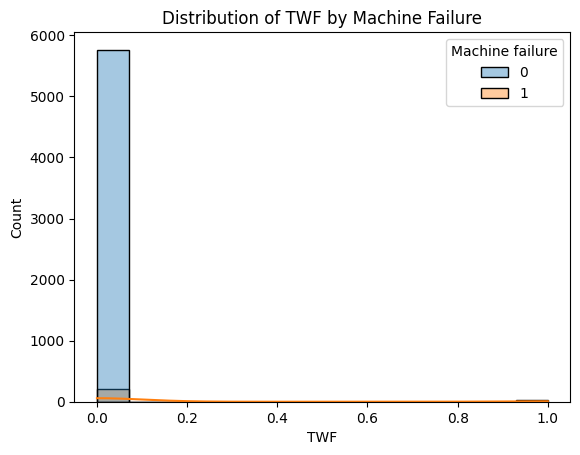

HDF


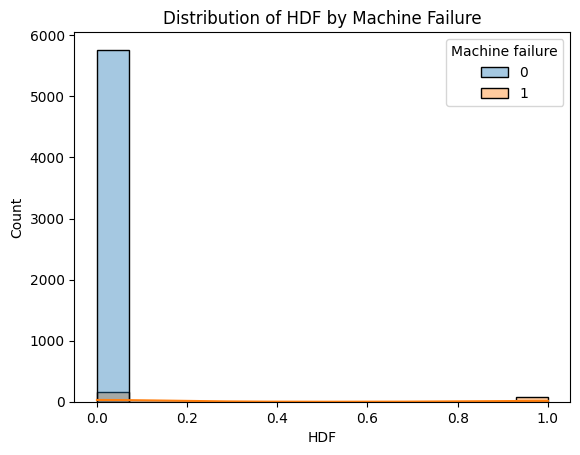

PWF


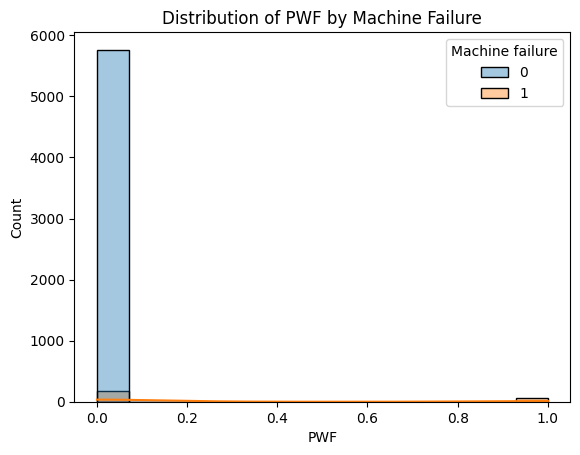

OSF


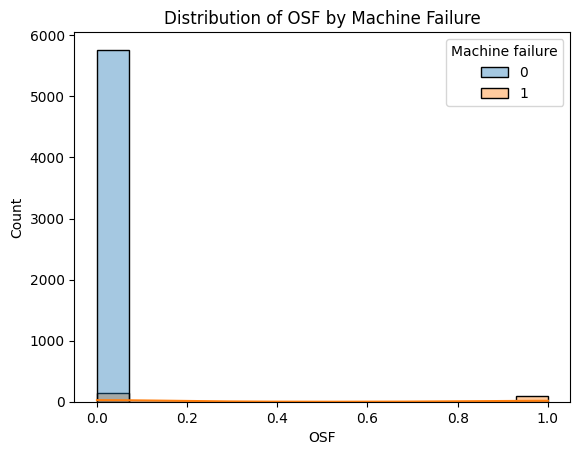

RNF


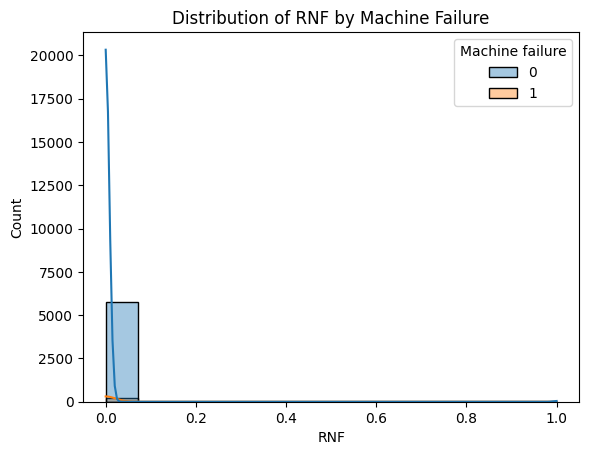

In [14]:
for c in df_l.columns:
  if c!="Machine failure" and c!='Type':
    print(c)
    sns.histplot(data=df_l,x=c,hue='Machine failure', kde=True,alpha=0.4)
    plt.title(f'Distribution of {c} by Machine Failure')
    plt.show()

In [15]:
for c in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
  print(f"{c}:{df_l[c].unique()}")

TWF:[0 1]
HDF:[0 1]
PWF:[0 1]
OSF:[0 1]
RNF:[0 1]


In [16]:
for var in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    cm = pd.crosstab(df_l['Machine failure'], df_l[var])
    print(f"\nConfusion matrix for {var}:\n", cm)


Confusion matrix for TWF:
 TWF                 0   1
Machine failure          
0                5765   0
1                 210  25

Confusion matrix for HDF:
 HDF                 0   1
Machine failure          
0                5765   0
1                 159  76

Confusion matrix for PWF:
 PWF                 0   1
Machine failure          
0                5765   0
1                 176  59

Confusion matrix for OSF:
 OSF                 0   1
Machine failure          
0                5765   0
1                 148  87

Confusion matrix for RNF:
 RNF                 0   1
Machine failure          
0                5753  12
1                 234   1


In [17]:

for var in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    cm = pd.crosstab(df_l['Machine failure'], df_l[var])
    print(f"\nConfusion matrix for {var}:\n", cm)
    df_l=df_l[df_l[var]==0]


Confusion matrix for TWF:
 TWF                 0   1
Machine failure          
0                5765   0
1                 210  25

Confusion matrix for HDF:
 HDF                 0   1
Machine failure          
0                5765   0
1                 134  76

Confusion matrix for PWF:
 PWF                 0   1
Machine failure          
0                5765   0
1                  77  57

Confusion matrix for OSF:
 OSF                 0   1
Machine failure          
0                5765   0
1                   4  73

Confusion matrix for RNF:
 RNF                 0   1
Machine failure          
0                5753  12
1                   4   0


Type M

Air temperature [K]


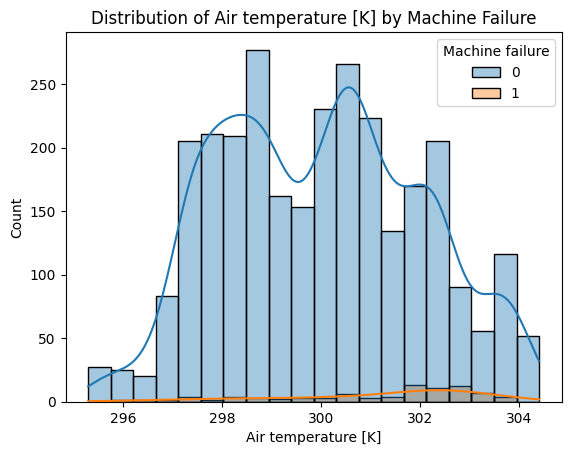

Process temperature [K]


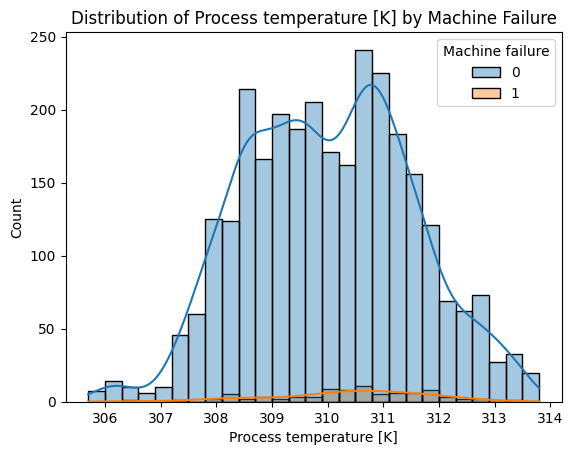

Rotational speed [rpm]


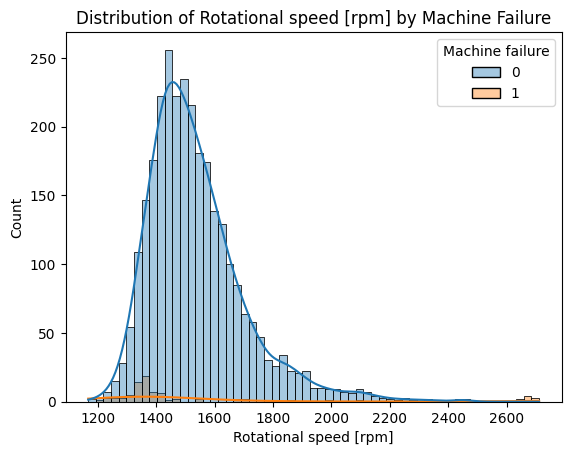

Torque [Nm]


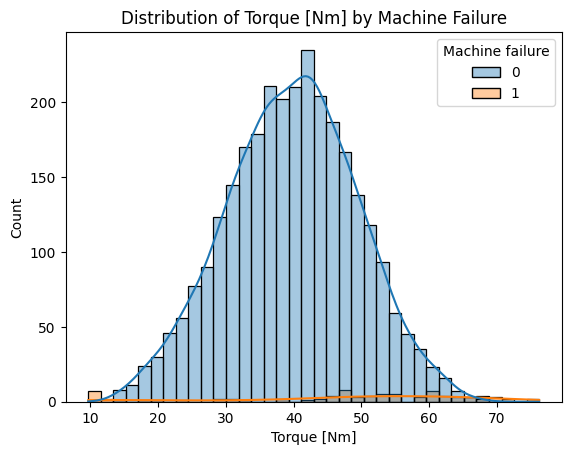

Tool wear [min]


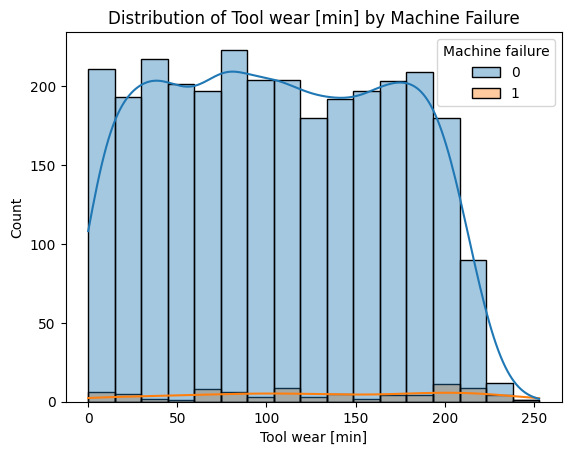

TWF


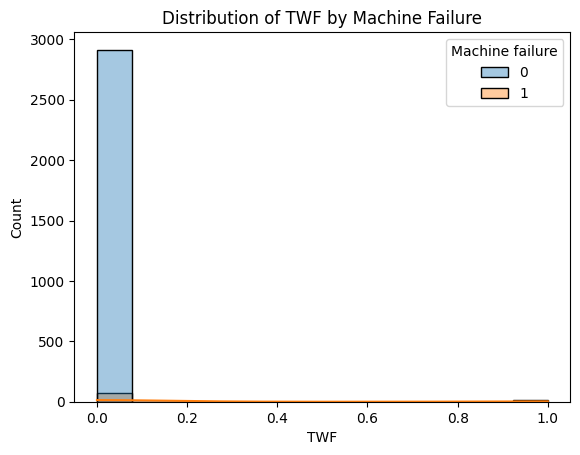

HDF


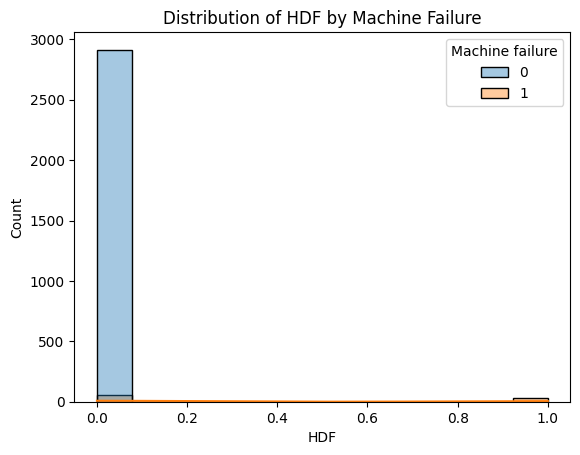

PWF


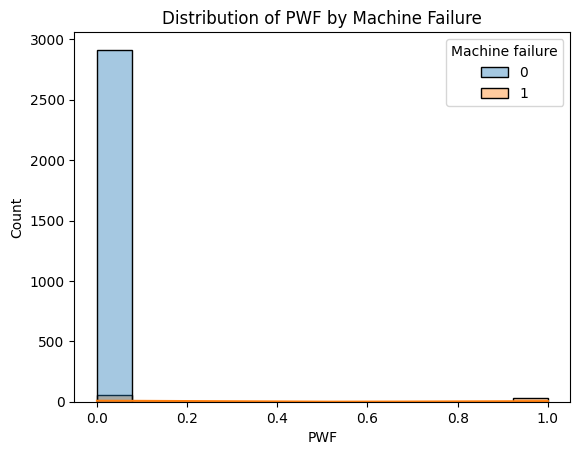

OSF


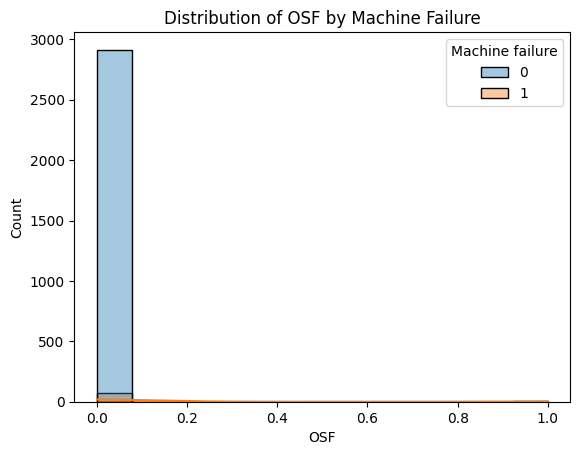

RNF


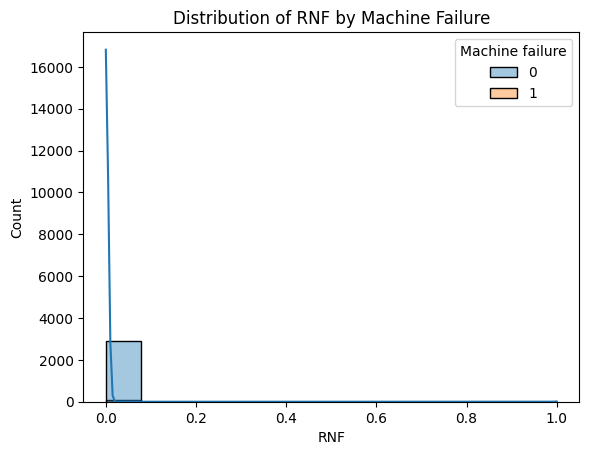

In [18]:
for c in df_m.columns:
  if c!="Machine failure" and c!='Type':
    print(c)
    sns.histplot(data=df_m,x=c,hue='Machine failure', kde=True,alpha=0.4)
    plt.title(f'Distribution of {c} by Machine Failure')
    plt.show()

In [19]:
for c in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
  print(f"{c}:{df_m[c].unique()}")

TWF:[0 1]
HDF:[0 1]
PWF:[0 1]
OSF:[0 1]
RNF:[0 1]


In [20]:
for var in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    cm = pd.crosstab(df_m['Machine failure'], df_m[var])
    print(f"\nConfusion matrix for {var}:\n", cm)


Confusion matrix for TWF:
 TWF                 0   1
Machine failure          
0                2914   0
1                  69  14

Confusion matrix for HDF:
 HDF                 0   1
Machine failure          
0                2914   0
1                  52  31

Confusion matrix for PWF:
 PWF                 0   1
Machine failure          
0                2914   0
1                  52  31

Confusion matrix for OSF:
 OSF                 0  1
Machine failure         
0                2914  0
1                  74  9

Confusion matrix for RNF:
 RNF                 0  1
Machine failure         
0                2912  2
1                  83  0


In [21]:
for var in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    cm = pd.crosstab(df_m['Machine failure'], df_m[var])
    print(f"\nConfusion matrix for {var}:\n", cm)
    df_m=df_m[df_m[var]==0]


Confusion matrix for TWF:
 TWF                 0   1
Machine failure          
0                2914   0
1                  69  14

Confusion matrix for HDF:
 HDF                 0   1
Machine failure          
0                2914   0
1                  38  31

Confusion matrix for PWF:
 PWF                 0   1
Machine failure          
0                2914   0
1                   8  30

Confusion matrix for OSF:
 OSF                 0  1
Machine failure         
0                2914  0
1                   4  4

Confusion matrix for RNF:
 RNF                 0  1
Machine failure         
0                2912  2
1                   4  0


Type H

In [22]:
for c in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
  print(f"{c}:{df_h[c].unique()}")

TWF:[0 1]
HDF:[0 1]
PWF:[0 1]
OSF:[0 1]
RNF:[0 1]


In [23]:
for var in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    cm = pd.crosstab(df_h['Machine failure'], df_h[var])
    print(f"\nConfusion matrix for {var}:\n", cm)


Confusion matrix for TWF:
 TWF                0  1
Machine failure        
0                982  0
1                 14  7

Confusion matrix for HDF:
 HDF                0  1
Machine failure        
0                982  0
1                 13  8

Confusion matrix for PWF:
 PWF                0  1
Machine failure        
0                982  0
1                 16  5

Confusion matrix for OSF:
 OSF                0  1
Machine failure        
0                982  0
1                 19  2

Confusion matrix for RNF:
 RNF                0  1
Machine failure        
0                978  4
1                 21  0


In [24]:
for var in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    cm = pd.crosstab(df_h['Machine failure'], df_h[var])
    print(f"\nConfusion matrix for {var}:\n", cm)
    df_h=df_h[df_h[var]==0]


Confusion matrix for TWF:
 TWF                0  1
Machine failure        
0                982  0
1                 14  7

Confusion matrix for HDF:
 HDF                0  1
Machine failure        
0                982  0
1                  6  8

Confusion matrix for PWF:
 PWF                0  1
Machine failure        
0                982  0
1                  2  4

Confusion matrix for OSF:
 OSF                0  1
Machine failure        
0                982  0
1                  1  1

Confusion matrix for RNF:
 RNF                0  1
Machine failure        
0                978  4
1                  1  0


Machine Type L: Machine fails [OSF=1(87),HDF=1(70), PWF=1(49),TWF=1(25)], <br>
Machine Type M: Machine fails [PWF=1(31),HDF=1(30),TWF=1(14),OSF=1(4)]
<br>
Machine Type H: Machine fails [HDF=1(8),TWF=1(7),PWF=1(4),OSF=1(1)]

Prediction

In [25]:
y_real=df['Machine failure']

In [26]:
y_pred= ((df['OSF'] == 1) | (df['HDF'] == 1) | (df['PWF'] == 1) | (df['TWF'] == 1)).astype(int)

In [27]:
accuracy = accuracy_score(y_real, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [28]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf = DecisionTreeClassifier()
X=df.drop(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],axis=1)
y=df['Machine failure']
clf.fit(X, y)
y_pred_dl=clf.predict(X)

In [29]:
accuracy_dl = accuracy_score(y, y_pred_dl)
print(f"Accuracy: {accuracy_dl:.2f}")

Accuracy: 1.00


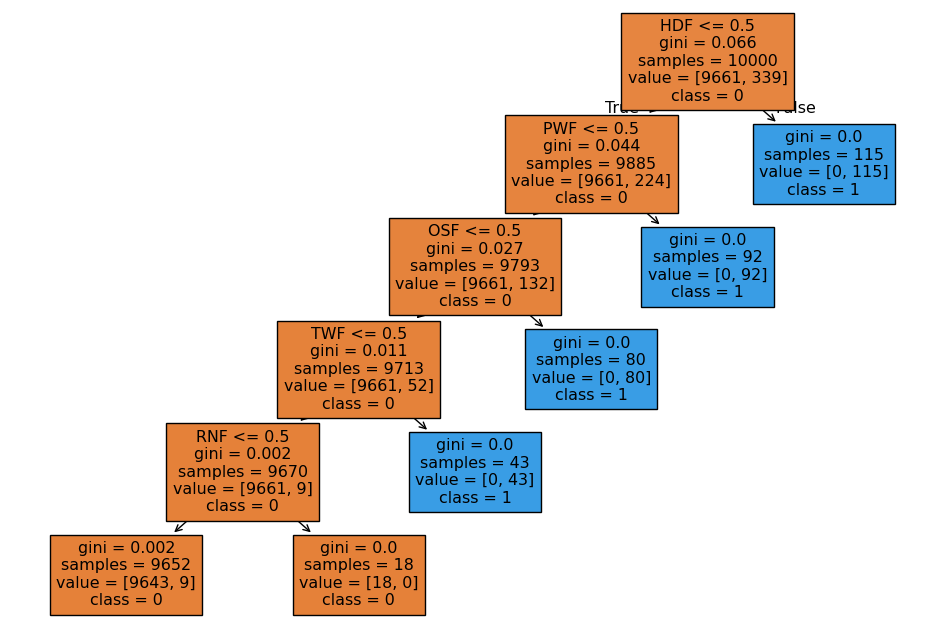

In [30]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['0','1'])
plt.show()

In [31]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')